# *Chapter 8: Numerical integration*

## The Trapezium Rule


The trapezium rule is a numerical method for approximating the definite integral of a function. It is particularly useful when an exact integral is difficult or impossible to compute analytically.

Given a function  $f(x)$ that is continuous on the interval $[a, b]$, the trapezium rule approximates the integral

$$ \int_a^b f(x) \, dx  $$

by dividing the interval into $ n $ equal subintervals, each of width $ h$:

$$
     \int_a^b f(x) \, dx \approx \frac{h}{2} \left[ f(x_0) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n) \right] 
$$

where
- $x_0 = a, \, x_1 = a + h, \, x_2 = a + 2h, \, \ldots, \, x_n = b$ are the points dividing the interval,
- $f(x_i)$ is the function value at each point $x_i$, and
- $h = (b-a)/n$.



Area = 5.7899


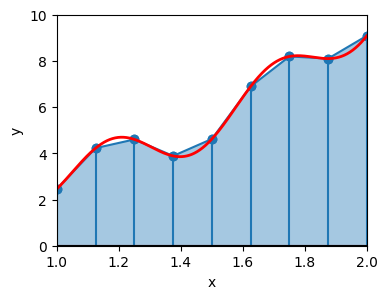

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def function(x):
    """Function y = f(x) to integrate"""
    f = np.sin(12*x) + x**(3)+2
    return f

def trapezium_rule(f, a, b, n):
    """
    Approximates the integral of a function f from a to b using the trapezium rule with n subintervals.

    Parameters:
    f (function): The function to integrate.
    a (float): The start point of the interval.
    b (float): The end point of the interval.
    n (int): The number of subintervals.

    Returns:
    area (float): The approximate value of the integral.
    x (np.array): Array containing x values
    y (np.array): Array containing the function (y) values
    """
    # Calculate the width of each subinterval
    h = (b - a) / n

    # Calculate the x values
    x = np.linspace(a, b, n+1)

    # Calculate the function values at the x points
    y = f(x)

    # Apply the trapezium rule formula
    area = (h / 2) * (y[0] + 2 * np.sum(y[1:n]) + y[n])

    return area, x, y

# Inputs:
a = 1
b = 2
n = 8

# Integrate y = function(x) using the Trapezium Rule
area, x, y = trapezium_rule(function, a, b, n)

# Print Area
print(f"Area = {area:.4f}")

# Plot Graph
xc = np.linspace(a, b, 1000)
yc = function(xc)

plt.figure(figsize=(4,3))
plt.fill_between(x, y, alpha=0.4)
plt.plot(x, y, 'o-')
plt.stem(x, y)
plt.plot(xc, yc, '-r', linewidth=2)
plt.plot([a, b], [0, 0], '-k')
plt.xlim([a, b])
plt.ylim([min(np.append(1.1*yc, 0)), max(np.append(1.1*yc, 0))])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Finite differences and the Forward Euler method

Consider the differential equation

$$u' = f(t, u)$$

Tthe equation in discretized in time. The value of the derivative the time step $n$ is

$$u'_n = f(t_n, u_n)$$

The derivative can be approximated by the method of **finite differences**:

$$ u'_n = \frac{ u_{n+1} - u_{n} }{ \Delta t } $$

Here,

- $u_{n+1}$ is the solution at the next time step.
- $u_n$ is the solution at the current time step.
- $t_n$ is the time of the current time step.
- $\Delta t$ is the time step size.

Rearranging the above equation to solve for $u_{n+1}$ gives the **Forward Euler** update rule:

$$ u_{n+1} = u_n + \Delta t \cdot f(t_n, u_n) $$


In the Forward Euler method, the next value of $u$ is computed using the current value of $u$, the step size $\Delta t$, and the derivative at the current time step. This method is simple and straightforward but can be less accurate for stiff or highly dynamic systems.

### Example: linear ODE

Using the Forward Euler method, solve the ODE:

$$ u' = 2u - 1 $$

subject to $u(0) = 2$ for the time interval $t \in [0, 2]$.

Plot the numerical solution together with the exact solution

$$u(t) = \frac{1}{2} + \frac{3}{2}e^{2t}$$

#### Solution

The Forward Euler update equation for this ODE becomes:

$$ u_{n+1} = u_n + \Delta t \cdot (2u_n - 1) $$

The time-step should not be larger than $\Delta t = 0.01$.

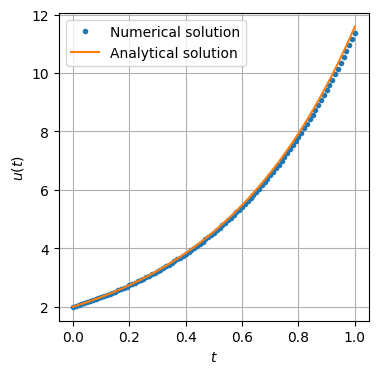

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
u0 = 2           # initial condition
t_start = 0      # initial time
t_max = 1        # maximum time
dt = 0.01       # time step size
t = np.arange(t_start, t_max + dt, dt)  # time array

# Create solution array
u = np.zeros(len(t))
# Initialise solution (set first value)
u[0] = u0

# Forward Euler method for non-linear equation
for n in range(1, len(t)):
    u[n] = u[n-1] + dt * (2 * u[n-1] - 1)

# Exact solution
u_exact = 0.5 + 1.5 * np.exp(2 * t)

# Plot solutions
plt.figure(figsize=(4, 4))
plt.plot(t, u, '.', label='Numerical solution')
plt.plot(t, u_exact, '-', label='Analytical solution')
plt.xlabel('$t$')
plt.ylabel('$u(t)$')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 1: Solving a first-order ODE

Using the Forward Euler method, solve the ODE:

$$ y' + y/x = \cos(x) $$

subject to $y(\pi/2) = 2$ for the time interval $x \in [\pi/2, 7\pi/2]$.

Plot the numerical solution and compare it with the exact solution

$$y(t) = \sin(x)  + \frac{\cos(x)+\pi/2}{x}$$

#### Answer

#### Solution

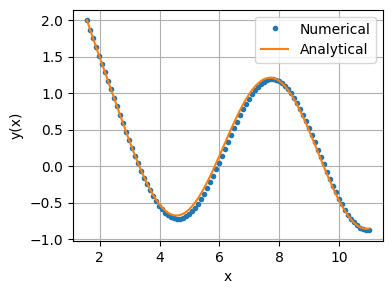

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
y0 = 2
x0 = np.pi / 2
x_end = 7*np.pi / 2
dx = 0.1
N = int((x_end - x0) / dx)

# Initialize arrays for x and y
x = np.linspace(x0, x_end, N+1)
y = np.zeros(N+1)
y[0] = y0

# Forward Euler method
for n in range(N):
    y[n+1] = y[n] + dx * (np.cos(x[n]) - y[n] / x[n])

# Exact solution
def exact_solution(x):
    return np.sin(x) + (np.cos(x) + np.pi/2) / x

# Plotting the numerical and exact solutions
plt.figure(figsize=(4,3))
plt.plot(x, y, '.', label='Numerical')
plt.plot(x, exact_solution(x), label='Analytical', linestyle='-')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid(True)
plt.show()


## Exercise 2: Motion of a simple pendulum

The equation of motion for a simple pendulum:

$$\frac{d^2\theta}{dt^2} + \frac{g}{L} \sin\theta = 0 $$

where

- $\theta$ is the angle that the pendulum makes with the vertical
- $g$ is the acceleration due to gravity
- $L$ is the length of the pendulum

To integrate numerically a second-order ODE (such as the one above)
we must rewrite it as a system of first-order ODEs.


Let $\theta_1 = \theta$ and $\theta_2 = \frac{d\theta}{dt}$. Then we can write:
   
 $$
   \frac{d\theta_1}{dt} = \theta_2
$$
   
  $$
   \frac{d\theta_2}{dt} = -\frac{g}{L} \sin(\theta_1)
 $$


Using the Forward Euler method, solve the ODE system above for $t \in [0, 7\pi/8]$ s.

Take

- $g = 9.81$ m/s$^2$
- $L = 1.0$ m

Initial conditions ($t=0$) are:

- $\theta= \theta_0 = \frac{\pi}{4}$ (initial angle)
- $\frac{d\theta}{dt}  = 0$ (no initial angular velocity)

Plot $\theta$ vs $t$ and compare it with the small-angle approximation solution:

$$\theta \approx \theta_0 \cos(\sqrt{g/L} t)$$

#### Answer

#### Solution

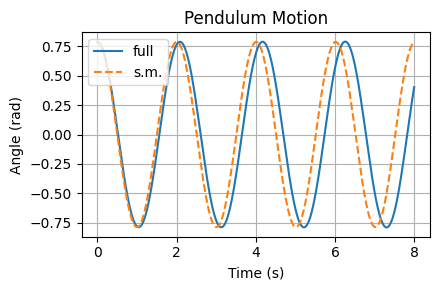

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
g = 9.81  # acceleration due to gravity (m/s^2)
L = 1.0   # length of the pendulum (m)
theta0 = np.pi / 4  # initial angle (radians)
omega0 = 0.0        # initial angular velocity (rad/s)

# Time parameters
t_max = 8  # maximum time (s)
dt = 0.0001   # time step (s)
t = np.arange(0, t_max, dt)  # time array

# Forward Euler method for non-linear equation
theta1 = np.zeros(len(t))
theta2 = np.zeros(len(t))
theta1[0] = theta0
theta2[0] = omega0

for i in range(1, len(t)):
    theta2[i] = theta2[i-1] - (g / L) * np.sin(theta1[i-1]) * dt
    theta1[i] = theta1[i-1] + theta2[i-1] * dt

# Analytical solution for small-angle approximation
theta_sm = theta0 * np.cos(np.sqrt(g / L) * t)

# Plot results
plt.figure(figsize=(4.5, 3))

plt.plot(t, theta1, label='full')
plt.plot(t, theta_sm, label='s.m.', linestyle='dashed')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Pendulum Motion')
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()